In [432]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

### Para iniciar el proceso de exploración de los datos, lo primero es importar los datos, para ello vamos a utilizar la libreria de pansas.

In [433]:
#El archivo de coursera_courses se importará como 'cours' y el de coursera_reviews como c_rvw.
cours = pd.read_csv('/kaggle/input/eda-proyecto-2-data-analitics/Coursera_courses.csv', encoding='utf-8')
c_rvw = pd.read_csv('/kaggle/input/eda-proyecto-2-data-analitics/Coursera_reviews.csv', encoding='utf-8')
#El archivo de edx_courses simplemente se denominará 'edx' así como el udemy_courses solo lo llamaremos 'udemy'
edx = pd.read_csv('/kaggle/input/eda-proyecto-2-data-analitics/edx_courses.csv', encoding= 'utf-8')
udemy = pd.read_csv('/kaggle/input/eda-proyecto-2-data-analitics/udemy_courses.csv', encoding= 'utf-8')

### El siguiente paso es observar los datos, los tipos de datos y ejemplo de su contenido. Por orden de incorporcaión vamos a trabajar primero con los datos de Coursera, que son 2 datasets, y luego observaremos los de las otras 2 instituciones.

In [434]:
cours.head(5)

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


In [435]:
cours['course_url'][0]

'https://www.coursera.org/learn/machine-learning'

### "el dataframe 'cours' anterior muestra 3 columnsas importantes, 2 en apariencia parecen mostrar contenido repetido como las columnas de 'name' y 'course_id', por ahora se conservarán las 2. Procederé a decartar la columna de 'course_url', a pesar que al acceder a las direcciones se puede extraer información muy importante, habría que valerse de la técnica del webscrapping para extraer la información.
### "Quedará pendiente en la agenda de trabajo, en caso de necesitarlo."

In [436]:
#En este caso se renombrará la variable 'cours', con el dataframe que contiene los valores necesarios
cours = cours[['name','institution','course_id']]

In [437]:
#Es momento de revisar el dataframe de 'c_rvw'.
print(c_rvw.shape)
c_rvw.head(3)

(1454711, 5)


,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training


### Existe una gran cantidad de 'reviews' como de 'reviewers', con mucha información en formato texto, si se hace un procesamiento de lenguaje natural se podría extraer información importante, pero básicamente sería una confirmación de lo que arroja la columna rating, por lo que se ha decidido para los efectos de este análisis en particular, descartar la columna 'reviews'. Para proseguir en este caso, se realizará un conteo de 'reviewers' por cada curso, y promediar el rating junto con el 'date_reviews' y estos resultados unirlos al dataframe 'cours'.

In [438]:
#Iniciaremos trabajando con el date reviews.
from datetime import datetime

c_rvw['date_reviews'] = c_rvw['date_reviews'].astype(str)
c_rvw['date_reviews'] = pd.to_datetime(c_rvw['date_reviews'], format='%b %d, %Y').dt.strftime('%Y-%m-%d')
c_rvw['date_reviews'][0]

#Agrupamos en un dataframe, el valor promedio de las fechas de las opiniones por curso.
c_rvw['date_reviews'] = pd.to_datetime(c_rvw['date_reviews'], format='%Y-%m-%d')
date_mean = c_rvw.groupby('course_id')['date_reviews'].mean().reset_index()
date_mean.columns = ['course_id', 'date_mean']

#Ahora vamos a hacer un conteo de los estudiantes que dejaron su opinion en la plataforma por cada curso.
revws = c_rvw.groupby('course_id')['reviewers'].count().reset_index()
revws.columns = ['course_id', 'num_reviews']

#En este caso se va a realizar un promedio de 'rating' por cada curso, se gradará un dataframe llamado rating
rating = c_rvw.groupby('course_id')['rating'].mean().round(1).reset_index()
rating.columns = ['course_id', 'rating']
df_unido = pd.merge(date_mean, revws, on = 'course_id' )
cours2 = pd.merge(df_unido, rating, on = 'course_id' )
coursera = pd.merge(cours, cours2, on = 'course_id')
coursera.head(3)

,name,institution,course_id,date_mean,num_reviews,rating
0,Machine Learning,Stanford University,machine-learning,2018-08-27 18:25:32.670288384,35895,4.8
1,Indigenous Canada,University of Alberta,indigenous-canada,2020-01-19 07:10:12.641815296,3702,4.8
2,The Science of Well-Being,Yale University,the-science-of-well-being,2020-04-16 11:32:17.386108928,20085,4.9


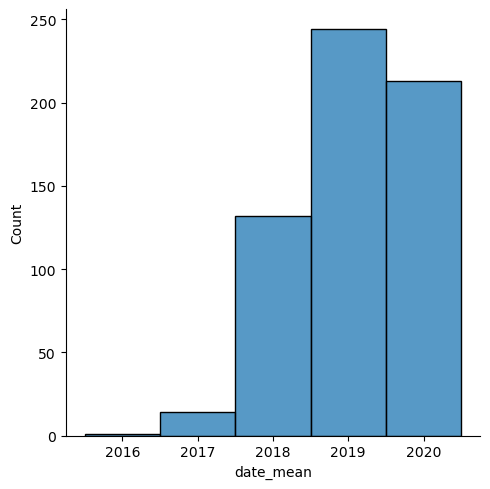

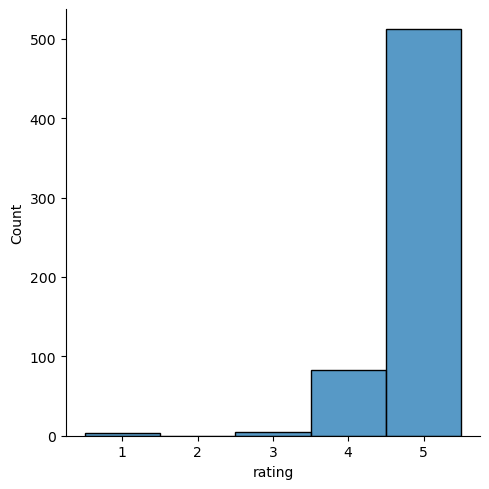

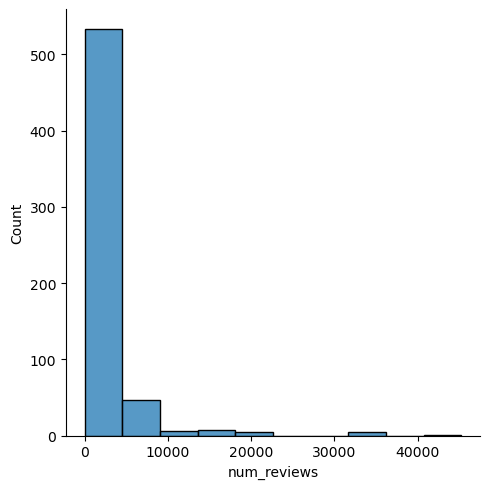

In [439]:
#Observemos la distribución de los valores por año, rating y numero de opiniones.
anio = coursera['date_mean'].dt.year

sns.displot(coursera, x= anio, discrete = True)
sns.displot(coursera, x='rating', discrete = True)
sns.displot(coursera, x='num_reviews', bins = 10)


### De los gráficos anteriores, podemos notar que la cantidad de opiniones son posteriores al año 2018, que la valoración promedio está por encima de 4 siendo el máximo valore ponderable el 5, Así como que la cantidad de revisiones están en menos de 1000 por curso. Seguiremos haciendo comparativas con estos datos mas adelante.

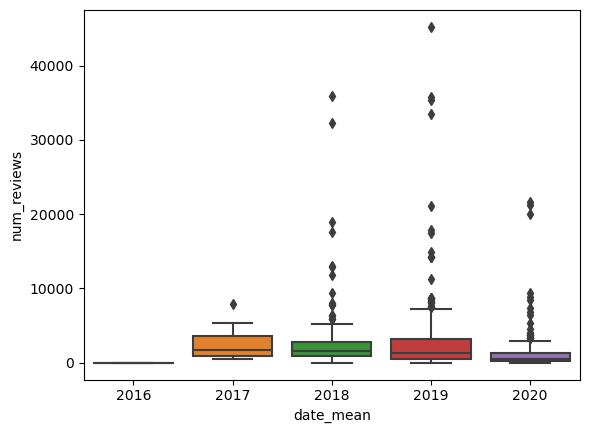

In [440]:
sns.boxplot(coursera, x = anio, y='num_reviews', )
plt.show()

### En el gráfico de caja anterior, se observan que la cantidad de opiniones prensenta mayor concentración en el año 2019. Así como varios cursos cuya cantidad de reviews, pasan los 10. Puede tratarse o de una exclusiva selección de cursos muy populares. extraigamos los valores de esos cursos y comparemoslos.

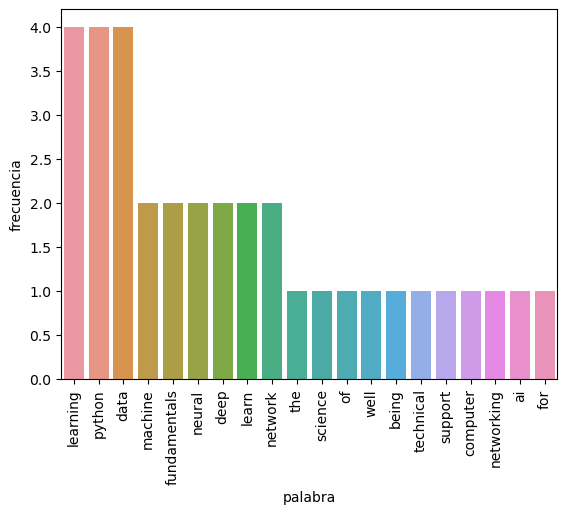

In [441]:
from collections import Counter
words = coursera.loc[coursera['num_reviews'] > 10000, 'course_id'].str.split('-',expand=True).stack()
word_counts = Counter(words)
top_20_words = word_counts.most_common(20)

df_top_20_words = pd.DataFrame(top_20_words, columns=['palabra', 'frecuencia'])
ax = sns.barplot(x='palabra', y='frecuencia', data=df_top_20_words)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

### Observando los valores que devuelve, podemos evidenciar que no se trata de simples outliers, hay un patrón en los cursos con mas de 10000 reviews. se trata de cursos principalmente relacionados con la ciencia de datos y la tecnología retacionada. Se graficará ahora una nube de palabara a partir de estos datos.

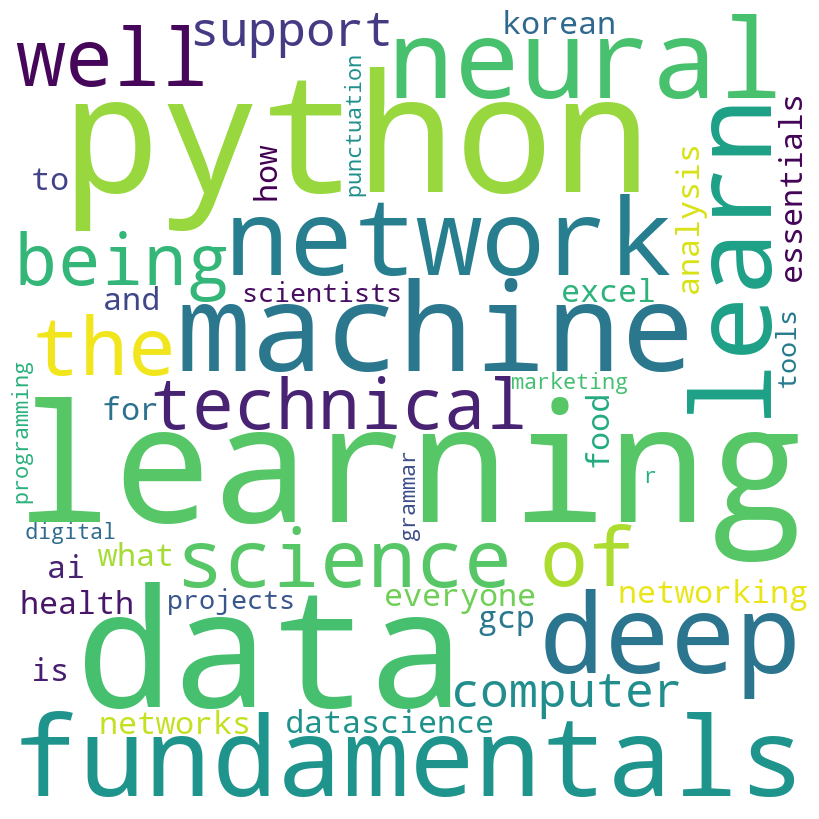

In [442]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate_from_frequencies(word_counts)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Ahora bien esta popularidad en cuanto a opiniones, observemos si está proporciona en cuanto a la valoración de la misma. 

Text(0.5, 1.0, 'Relación cantidad de Reviews y Rating')

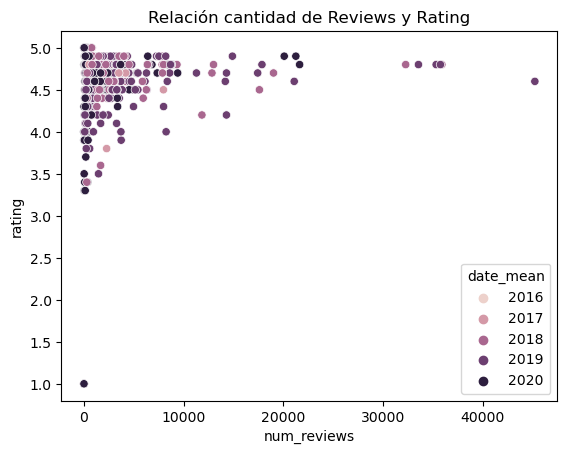

In [443]:
x = 'num_reviews'
y = 'rating'
ax = sns.scatterplot(x=x,y=y, data=coursera, hue=anio)                 
ax.set_title('Relación cantidad de Reviews y Rating')

### Los cursos mas populares en cuanto a opinines, poseen una valoración superior a 4.5. Por los que no solo han sido los mas comentados sino de los mejores valorados.
### Ahora bien, en coursera se publican cursos brindados por distintas instituciones. Revisemos cuales sol las instituciones mas populares.

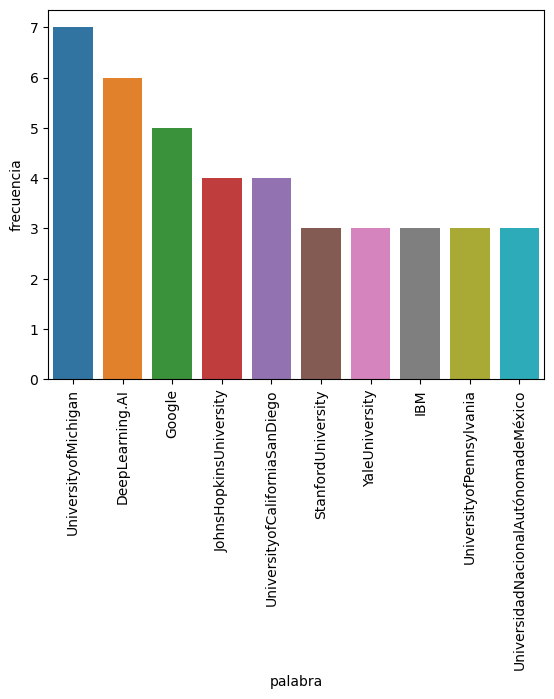

In [444]:
from collections import Counter
inst = coursera.loc[coursera['num_reviews'] > 5000, 'institution'].tolist()
inst = [str(i).replace(" ","") for i in inst]

word_counts = Counter(inst)
top_10 = word_counts.most_common(10)

df_top_10_words = pd.DataFrame(top_10, columns=['palabra', 'frecuencia'])
ax = sns.barplot(x='palabra', y='frecuencia', data=df_top_10_words)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

### A partit de ahora se va a observar los datos de la plataforma EDX. 

In [445]:
edx.head(5)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...


In [446]:
edx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

### Observando los datos y su distribución, se puede apreciar que no tiene una columna de identificación de valores únicos, para este caso se tomará como referencia la columna 'title'. Así mismo para poder hacer algunos análisis importante en los datos de EDX, hay que hacer algunas transformaciones, debido a que hay columnas con valores númericos pero aparecen de tipo objeto, o están combinados con cadenas de texto, lo que hace complicado realizar cálculos a partir de ellos.

In [447]:
#Comenzamos primero revisando la columna title, a ver si existen valores duplicados.
duplicates = edx[edx.duplicated(['title'], keep=False)]
filtered_df = edx[edx['title'].isin(duplicates['title'])]

filtered_df.head()


,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
59,Introduction to Probability,"Learn probability, an essential language and s...","97,291",Self-paced on your time,Harvard University,Joseph Blitzstein,Intermediate,Data Analysis & Statistics,English,English,5–10 hours per week,10 Weeks,FREE-Add a Verified Certificate for $99 USD,Probability and statistics help to bring logic...,NaN,https://www.edx.org/course/introduction-to-pro...
95,Introduction to Probability,"Learn probability, an essential language and s...","97,291",Self-paced on your time,Harvard University,Joseph Blitzstein,Intermediate,Data Analysis & Statistics,English,English,5–10 hours per week,10 Weeks,FREE-Add a Verified Certificate for $99 USD,Probability and statistics help to bring logic...,NaN,https://www.edx.org/course/introduction-to-pro...
159,Marketing Management,Learn how to effectively apply marketing manag...,"80,010",Self-paced on your time,Indian Institute of Management Bangalore,Ashis Mishra,Intermediate,Business & Management,English,"English, हिन्दी",2–4 hours per week,9 Weeks,FREE-Add a Verified Certificate for $150 USD,According to world-renowned management consult...,NaN,https://www.edx.org/course/marketing-management
161,Introduction to Marketing,"Learn the fundamentals to marketing, including...","169,126",Self-paced on your time,University of British Columbia,Darren Dahl-Paul Cubbon,Introductory,Business & Management,English,English,3–5 hours per week,6 Weeks,FREE-Add a Verified Certificate for $150 USD,Marketing is a crucial function in all busines...,NaN,https://www.edx.org/course/introduction-to-mar...
388,Marketing Management,Learn key marketing strategies and tactics to ...,"43,415",Instructor-led on a course schedule,"The University of Maryland, College Park-Unive...",Judy Frels-David Godes-P.K. Kannan-Mary Beth F...,Advanced,Business & Management,English,English,8–10 hours per week,7 Weeks,FREE-Add a Verified Certificate for $214 USD,"Mark Cuban, owner of the Dallas Mavericks, put...",NaN,https://www.edx.org/course/marketing-management-2


### No se puede refereciar la columna 'title' como valores únicos, debido a que existen varios cursos con el mismo título pero en esencia son distintos. En este caso se procederá a crear una columna id, a partir del índice, luego de haber borrado la única fila duplicada.

In [448]:
edx.drop([95], axis=0, inplace= True)

edx = edx.reset_index(drop = True)

#Se crea la nueva columna 'course_id' a partir del índice del dataframe, sumandole un valor de '1234', con el fin de crear distinción con respecto al índice del dataframe.
edx['course_id'] = edx.index + 1234
edx.head(3)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url,course_id
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online,1234
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...,1235
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...,1236


In [449]:
edx['n_enrolled'] = edx['n_enrolled'].str.replace(',','').astype(float)
edx.head(1)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url,course_id
0,How to Learn Online,Learn essential strategies for successful onli...,124980.0,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online,1234


In [450]:
edx['price_certify'] = edx['price'].str.extract('(\d+)').astype(int)
edx['course_weeks'] = edx['course_length'].str.extract('(\d+)').astype(int)
edx.head(2)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url,course_id,price_certify,course_weeks
0,How to Learn Online,Learn essential strategies for successful onli...,124980.0,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online,1234,49,2
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864.0,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...,1235,49,7


### Ya se hicieron algunas transformaciones importantes. Por los que en este momento pasaré a dejar el dataframe solo con las columnas, con las que haremos algunos análisis claves. Se va a descartar, las columnas 'sumary','instructors','subtitles', 'price','course_length', 'coursese_syllabus','course_url'. Algunas de esta columnas ya se ha extraido el valor a utilizar en otra columna, o aportan valores redundantes, o no determinantes para el propósito de este proyecto.

In [451]:
edx = edx[['title', 'course_id', 'n_enrolled', 'course_type', 'institution', 'Level', 'subject', 'language','course_effort', 'price_certify',
       'course_weeks']]
edx.head(2)

,title,course_id,n_enrolled,course_type,institution,Level,subject,language,course_effort,price_certify,course_weeks
0,How to Learn Online,1234,124980.0,Self-paced on your time,edX,Introductory,Education & Teacher Training,English,2–3 hours per week,49,2
1,Programming for Everybody (Getting Started wit...,1235,293864.0,Self-paced on your time,The University of Michigan,Introductory,Computer Science,English,2–4 hours per week,49,7


### Ahora bien, EDX maneja la política de que el acceso al contenido de los cursos es gratis, pero el acceso al certificado tiene un costo. Sin embargo no están los datos de quienes pagaron o no por la certificación, sin embargo haremos una comparativa, acerca del precio, las semanas que dura el curso y aquellos inscritos.

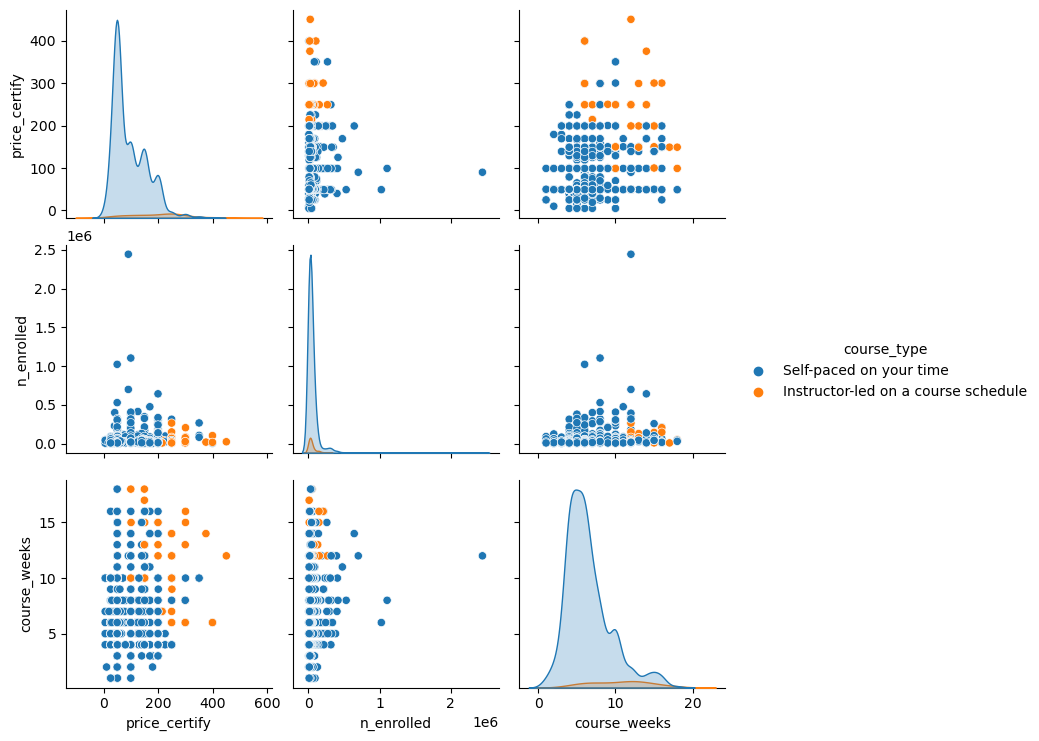

In [452]:
sns.pairplot(edx, vars=['price_certify','n_enrolled','course_weeks'], hue='course_type')

### Haciendo la matriz de comparación por pares, de las 3 variables númericas del dataset, no se logra observar al menos una relación lineal uniforme, sin embargo hay cierta conotación en cuanto a la duración del curso y el precio del certificado. Esperemos ahora que puede arrojar la matriz de correlación.

<Axes: >

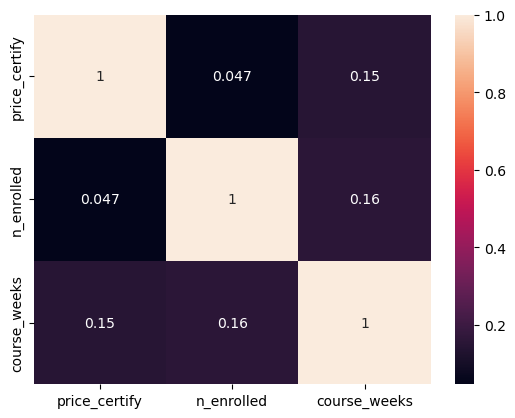

In [453]:
sns.heatmap(edx[['price_certify','n_enrolled','course_weeks']].corr(), annot=True)

### Evidentemente la correlación entre estas variables es bastante baja. Ahora veamos la incidencia con respecto a las otras variables. Ya que al igual que en coursera, parece haber un gran números de inscritos en algunos cursos que pueden visualizarse como outliers, por lo que orientaremos un momento nuestro análisis a ese sector.

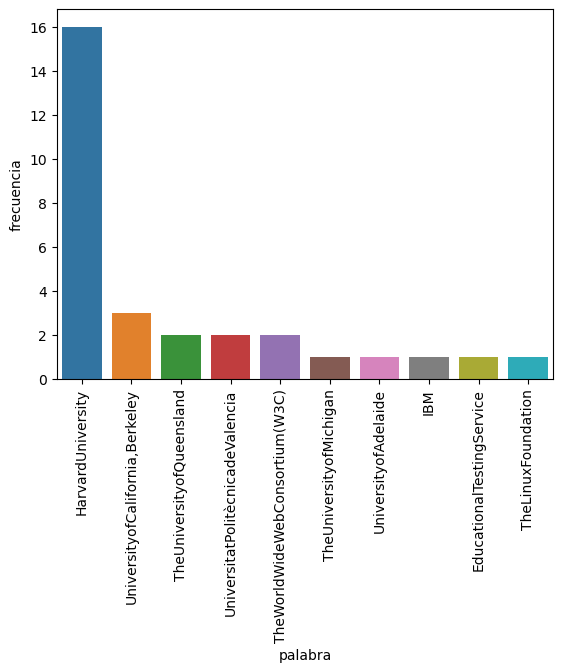

In [454]:
#Comenzamos comparando las instituciones con cursos, de mas de 200k inscritos.
inst = edx.loc[edx['n_enrolled'] > 200000, 'institution'].tolist()
inst = [str(i).replace(" ","") for i in inst]

word_counts = Counter(inst)
top_10 = word_counts.most_common(10)

df_top_10_words = pd.DataFrame(top_10, columns=['palabra', 'frecuencia'])
ax = sns.barplot(x='palabra', y='frecuencia', data=df_top_10_words)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

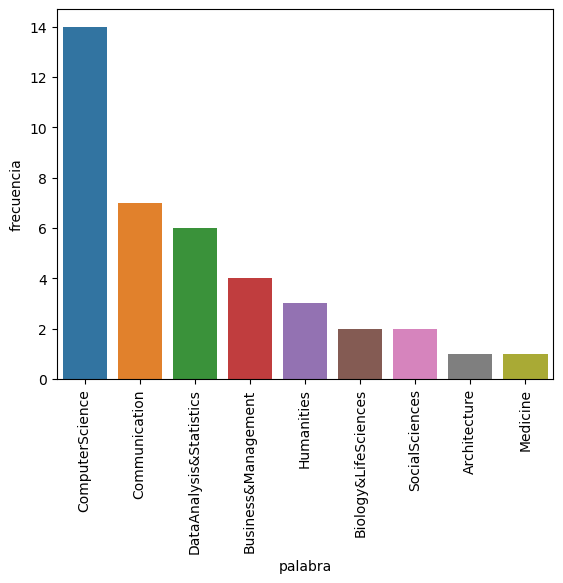

In [455]:
#En este caso observaremos la areas del conocimiento en las cuales hay cursos con mas de 200k inscritos
inst = edx.loc[edx['n_enrolled'] > 200000, 'subject'].tolist()
inst = [str(i).replace(" ","") for i in inst]

word_counts = Counter(inst)
top_10 = word_counts.most_common(10)

df_top_10_words = pd.DataFrame(top_10, columns=['palabra', 'frecuencia'])
ax = sns.barplot(x='palabra', y='frecuencia', data=df_top_10_words)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

### En la comparativa con los números de inscritos y los institutos, hay una clara tendencia, que la Universidad de Harvard acapara gran parte de la inscripción académica, mientras que en cuanto áreas de estucio, domina las ciencias de la computacion.

## Ahora observemos a 'Udemy'

In [456]:
udemy.head(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance


In [457]:
udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


### Con relación a Udemy, de la muestra de los datos están bastante bien claros y listos para analizar, sin embargo se va a borrar la columna 'url', ya que por el momento no aporta valor adicional. 

In [458]:
udemy.drop(['url','num_lectures'], axis=1, inplace=True)

### Seguirmos observando, primero revisaremos la relación entre los valores numéricos, seguidamente evaluar el valor de correlación entre ellos.

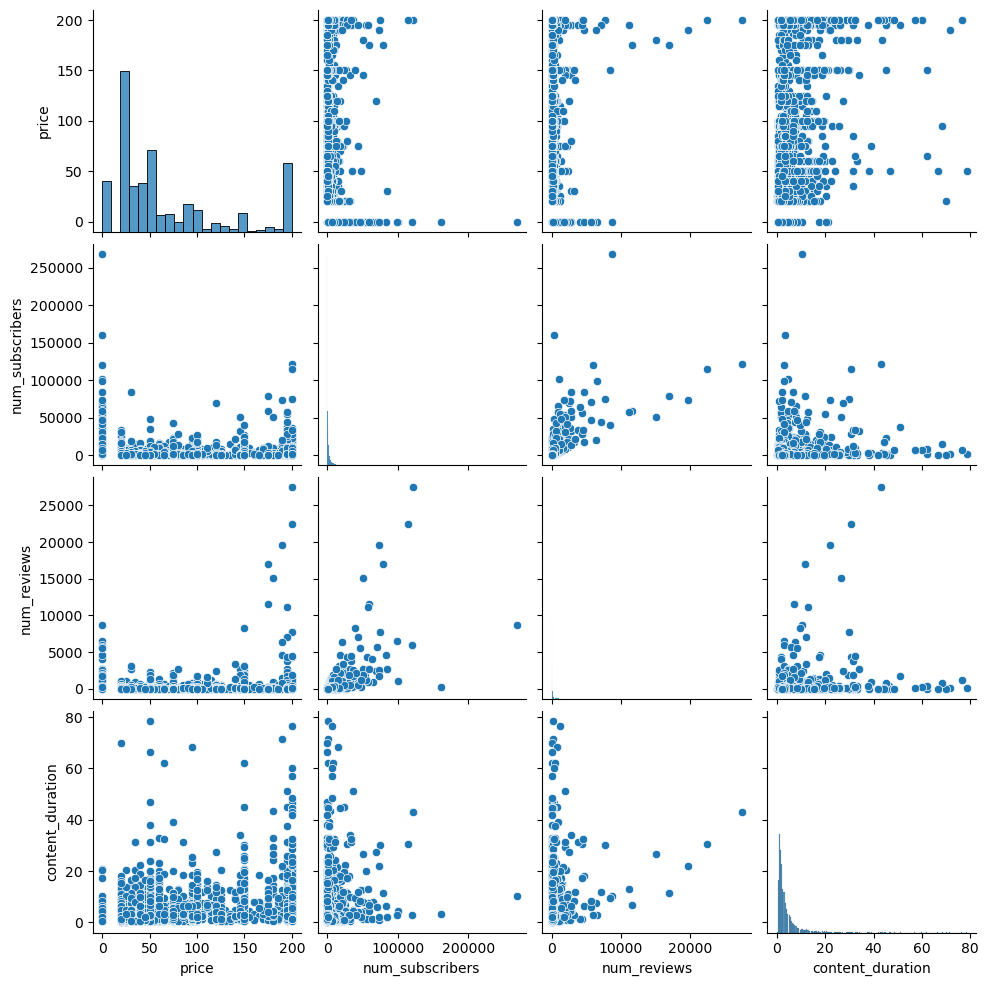

In [459]:
sns.pairplot(udemy, vars=['price','num_subscribers','num_reviews','content_duration'])

<Axes: >

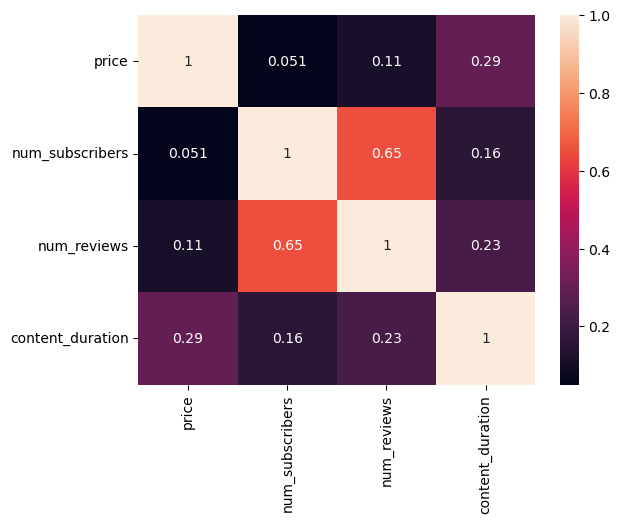

In [460]:
sns.heatmap(udemy[['price','num_subscribers','num_reviews','content_duration']].corr(), annot=True)

### En los graficos anteriores, se observa una ligera relación entre el número de opiniones en relación al número de inscritos por curso. Algo lógico de esperar. Ahora evaluemos como se comportan ahora las variables numéricas en relación a las demás columnas.

### Se comenzará observando por sector con mayor retorno de dinero.

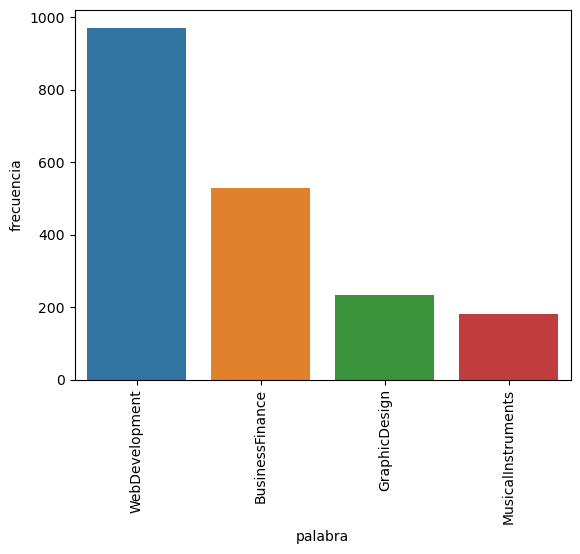

In [461]:
udemy['return'] = udemy['price'] * udemy['num_subscribers']
inst = udemy.loc[udemy['return'] > 20000, 'subject'].tolist()
inst = [str(i).replace(" ","") for i in inst]

word_counts = Counter(inst)
top_10 = word_counts.most_common(10)

df_top_10_words = pd.DataFrame(top_10, columns=['palabra', 'frecuencia'])
ax = sns.barplot(x='palabra', y='frecuencia', data=df_top_10_words)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

### En este caso está segmentado al desarrollo web, los cursos con mayor nivel de retorno. Ahora bien. Observemos como se han comportado las ventas de los cursos en el tiempo.

<Axes: xlabel='published_timestamp', ylabel='return'>

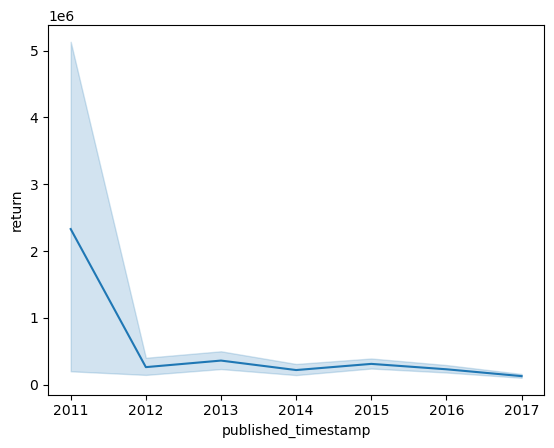

In [462]:
udemy['published_timestamp'] = pd.to_datetime(udemy['published_timestamp'], format='%Y-%m-%d')
year = udemy['published_timestamp'].dt.year
sns.lineplot(data=udemy, x=year, y="return")

### Es evidente que las ventas al menos del 2012 al 2017, en cuanto a la publicación de los cursos, va decreciendo. ¿Será de los cursos con mas retorno en ventas de los mas antiguos?

In [463]:
curso_mas_vendido = udemy.loc[udemy['return'] == udemy['return'].max(), ['course_title', 'published_timestamp','price','return']]
curso_mas_vendido

,course_title,published_timestamp,price,return
3230,The Web Developer Bootcamp,2015-11-02 21:13:27+00:00,200,24316800


### Bueno, el curso mas vendido de UDEMY no está entre los mas antiguos. Revisemos ahora lo que seria la tasa de conversión de usuarios de los cursos gratuitos a cursos pagos.

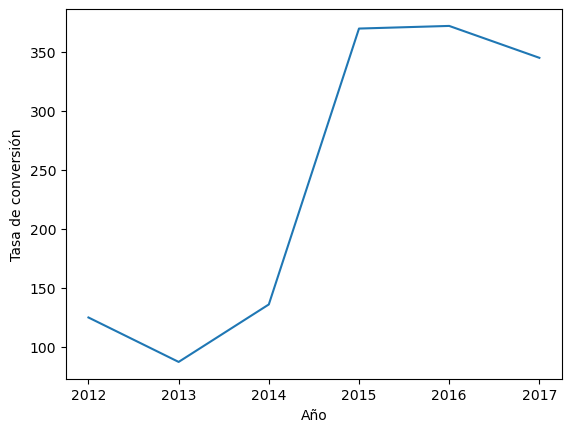

In [464]:
grupos = udemy.groupby([udemy['published_timestamp'].dt.year, 'is_paid'])

# Calcular el número de inscriptos en cursos pagados y gratuitos para cada año
num_inscriptos_por_anio = grupos['num_subscribers'].sum()

# Calcular la tasa de conversión para cada año
tasa_conversion_por_anio = (num_inscriptos_por_anio.loc[:, True] / num_inscriptos_por_anio.loc[:, False] * 100).round(2)

# Crear un nuevo DataFrame con los datos de la tasa de conversión por año
df_tasa_conversion = pd.DataFrame({'Año': tasa_conversion_por_anio.index.get_level_values(0),
                                   'Tasa de conversión': tasa_conversion_por_anio.values})

sns.lineplot(df_tasa_conversion, x='Año', y='Tasa de conversión')
plt.show()

### La tasa de conversión presentó crecimiento en todos los años menos en 2013 y 2017, sin embargo marcó una tendencia significativa del 2013 hasta el 2016

### Es el momento de llevar nuestros datos a la herramienta de visualización. Para generar las respectivas conclusiones. Por los que vamos a exportarlos ya transformados

In [465]:
coursera.to_csv('coursera.csv', index=False)
edx.to_csv('edx.csv', index=False)
udemy.to_csv('udemy.csv', index=False)